#FINAL PROJECT 1 (LINEAR REGRESION)-PHYTON FOR DATA SCIENCE
1. Ramadhan Astari        - PYTN-KS14-018
2. Krisna Winar Setiawan  - PYTN-KS14-016
3. Jaelani                - PYTN-KS14-002

---



#Project Overview
Uber and Lyft Dataset Boston, MA
This is a very beginner-friendly dataset. It does contain a lot of NA values. It is a good dataset if you want to use a Linear Regression Model to see the pattern between different predectors such as hour and price.

A really amazing part of this dataset is that I have included the corresponding weather data for that hour with a short summary of the weather. Other important factors are temperature, wind, and sunset.

# REGRESI LINEAR

Dalam regresi linier kita akan membutuhkan 2 sets variabel. Salah satunya adalah variabel dependen (disebut sebagai y) dan kedua variabel independen (disebut sebagai x). Sebagian besar tugas bergantung pada memprediksi dengan 
benar y dengan bantuan kombinasi x. Biasanya, analisis regresi digunakan untuk satu (atau lebih) dari tiga tujuan: 

1. Memodelkan hubungan antara x dan y; 
2. Prediksi variabel target (forecasting);
3. Dan pengujian hipotesis. diambil dari sini






# PREAPERING DATA

In [ ]:
! chmod 600 /content/kaggle.json

In [ ]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d brllrb/uber-and-lyft-dataset-boston-ma

 88% 39.0M/44.5M [00:00<00:00, 70.9MB/s]
100% 44.5M/44.5M [00:00<00:00, 62.2MB/s]


In [ ]:
import zipfile
zip_file = zipfile.ZipFile('/content/uber-and-lyft-dataset-boston-ma.zip', 'r')
zip_file.extractall('/tmp/')

In [ ]:
df = pd.read_csv('/tmp/rideshare_kaggle.csv')
df

id     timestamp  hour  day  month  \
0       424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1       4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2       981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3       c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4       e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   
...                                      ...           ...   ...  ...    ...   
693066  616d3611-1820-450a-9845-a9ff304a4842  1.543708e+09    23    1     12   
693067  633a3fc3-1f86-4b9e-9d48-2b7132112341  1.543708e+09    23    1     12   
693068  64d451d0-639f-47a4-9b7c-6fd92fbd264f  1.543708e+09    23    1     12   
693069  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e  1.543708e+09    23    1     12   
693070  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda  1.543708e+09    23    1     12   

                   datetime          timezone            source  \
0       2018-12-16 09:30:07  America/New_York  Haymarket Square   
1       2018-11-27 02:00:23  America/New_York  Haymarket Square   
2       2018-11-28 01:00:22  America/New_York  Haymarket Square   
3       2018-11-30 04:53:02  America/New_York  Haymarket Square   
4       2018-11-29 03:49:20  America/New_York  Haymarket Square   
...                     ...               ...               ...   
693066  2018-12-01 23:53:05  America/New_York          West End   
693067  2018-12-01 23:53:05  America/New_York          West End   
693068  2018-12-01 23:53:05  America/New_York          West End   
693069  2018-12-01 23:53:05  America/New_York          West End   
693070  2018-12-01 23:53:05  America/New_York          West End   

          destination cab_type  ... precipIntensityMax uvIndexTime  \
0       North Station     Lyft  ...             0.1276  1544979600   
1       North Station     Lyft  ...             0.1300  1543251600   
2       North Station     Lyft  ...             0.1064  1543338000   
3       North Station     Lyft  ...             0.0000  1543507200   
4       North Station     Lyft  ...             0.0001  1543420800   
...               ...      ...  ...                ...         ...   
693066      North End     Uber  ...             0.0000  1543683600   
693067      North End     Uber  ...             0.0000  1543683600   
693068      North End     Uber  ...             0.0000  1543683600   
693069      North End     Uber  ...             0.0000  1543683600   
693070      North End     Uber  ...             0.0000  1543683600   

        temperatureMin  temperatureMinTime  temperatureMax  \
0                39.89          1545012000           43.68   
1                40.49          1543233600           47.30   
2                35.36          1543377600           47.55   
3                34.67          1543550400           45.03   
4                33.10          1543402800           42.18   
...                ...                 ...             ...   
693066           31.42          1543658400           44.76   
693067           31.42          1543658400           44.76   
693068           31.42          1543658400           44.76   
693069           31.42          1543658400           44.76   
693070           31.42          1543658400           44.76   

        temperatureMaxTime  apparentTemperatureMin  \
0               1544968800                   33.73   
1               1543251600                   36.20   
2               1543320000                   31.04   
3               1543510800                   30.30   
4               1543420800                   29.11   
...                    ...                     ...   
693066          1543690800                   27.77   
693067          1543690800                   27.77   
693068          1543690800                   27.77   
693069          1543690800                   27.77   
693070          1543690800                   27.77   

        apparentTemperatureMinTime  appar

# DATA PROCESSING

In [ ]:
df.shape

(693071, 57)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

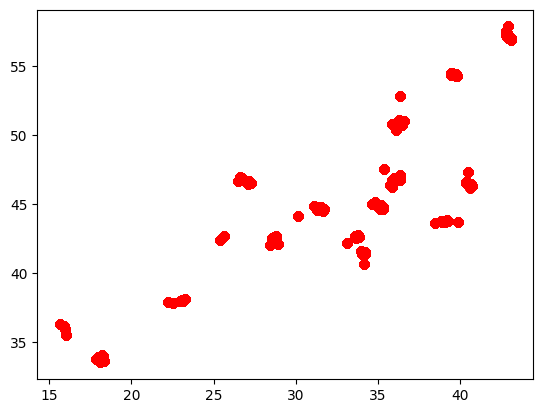

In [ ]:
x = df["temperatureMin"]
y = df["temperatureMax"]
plt.scatter(x, y, c ="red")
plt.show()

Data ini hanyalah gambaran sementara, Data mungkin dan akan berubah seiring waktu.

# CODING PROBLEM 1
Test the Understanding

* predicting Maxtemperature from Min temperature values. To see if they are correlative.

In [ ]:
from sklearn.linear_model import LinearRegression
X= np.array(df["temperatureMin"]).reshape(-1, 1)
y= df["temperatureMax"]
reg = LinearRegression().fit(X, y)
reg

LinearRegression()

# CHECK THE $R^2$

In [ ]:
reg.score(X,y)

0.6130034231962934

# MEANING OF $R^2$

In [ ]:
reg.get_params (deep=True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
reg.predict(np.array([32]).reshape(-1,1))

array([44.26505619])

# ANALISIS Of DATA
sklearen framework

In [ ]:
pd. get_option("display.max_columns")
df.head()

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0     Lyft  ...             0.1276  1544979600           39.89   
1     Lyft  ...             0.1300  1543251600           40.49   
2     Lyft  ...             0.1064  1543338000           35.36   
3     Lyft  ...             0.0000  1543507200           34.67   
4     Lyft  ...             0.0001  1543420800           33.10   

   temperatureMinTime  temperatureMax  temperatureMaxTime  \
0          1545012000           43.68          1544968800   
1          1543233600           47.30          1543251600   
2          1543377600           47.55          1543320000   
3          1543550400           45.03          1543510800   
4          1543402800           42.18          1543420800   

   apparentTemperatureMin  apparentTemperatureMinTime  apparentTemperatureMax  \
0                   33.73                  1545012000                   38.07   
1                   36.20                  1543291200                   43.92   
2                   31.04                  1543377600                   44.12   
3                   30.30                  1543550400                   38.53   
4                   29.11                  1543392000                   35.75   

  apparentTemperatureMaxTime  
0                 1544958000  
1                 1543251600  
2                 1543320000  
3                 1543510800  
4                 1543420800  

[5 rows x 57 columns]

jadi ada hampir 46 kolom dengan nilai numerik, kami akan memilih beberapa untuk menjelaskan model regresi untuk memprediksi harga.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [ ]:
df.describe()

timestamp           hour            day          month  \
count  6.930710e+05  693071.000000  693071.000000  693071.000000   
mean   1.544046e+09      11.619137      17.794365      11.586684   
std    6.891925e+05       6.948114       9.982286       0.492429   
min    1.543204e+09       0.000000       1.000000      11.000000   
25%    1.543444e+09       6.000000      13.000000      11.000000   
50%    1.543737e+09      12.000000      17.000000      12.000000   
75%    1.544828e+09      18.000000      28.000000      12.000000   
max    1.545161e+09      23.000000      30.000000      12.000000   

               price       distance  surge_multiplier       latitude  \
count  637976.000000  693071.000000     693071.000000  693071.000000   
mean       16.545125       2.189430          1.013870      42.338172   
std         9.324359       1.138937          0.091641       0.047840   
min         2.500000       0.020000          1.000000      42.214800   
25%         9.000000       1.280000          1.000000      42.350300   
50%        13.500000       2.160000          1.000000      42.351900   
75%        22.500000       2.920000          1.000000      42.364700   
max        97.500000       7.860000          3.000000      42.366100   

           longitude    temperature  ...  precipIntensityMax   uvIndexTime  \
count  693071.000000  693071.000000  ...       693071.000000  6.930710e+05   
mean      -71.066151      39.584388  ...            0.037374  1.544044e+09   
std         0.020302       6.726084  ...            0.055214  6.912028e+05   
min       -71.105400      18.910000  ...            0.000000  1.543162e+09   
25%       -71.081000      36.450000  ...            0.000000  1.543421e+09   
50%       -71.063100      40.490000  ...            0.000400  1.543770e+09   
75%       -71.054200      43.580000  ...            0.091600  1.544807e+09   
max       -71.033000      57.220000  ...            0.145900  1.545152e+09   

       temperatureMin  temperatureMinTime  temperatureMax  temperatureMaxTime  \
count   693071.000000        6.930710e+05   693071.000000        6.930710e+05   
mean        33.457774        1.544042e+09       45.261313        1.544047e+09   
std          6.467224        6.901954e+05        5.645046        6.901353e+05   
min         15.630000        1.543122e+09       33.510000        1.543154e+09   
25%         30.170000        1.543399e+09       42.570000        1.543439e+09   
50%         34.240000        1.543727e+09       44.680000        1.543788e+09   
75%         38.880000        1.544789e+09       46.910000        1.544814e+09   
max         43.100000        1.545192e+09       57.870000        1.545109e+09   

       apparentTemperatureMin  apparentTemperatureMinTime  \
count           693071.000000                6.930710e+05   
mean                29.731002                1.544048e+09   
std                  7.110494                6.871862e+05   
min                 11.810000                1.543136e+09   
25%                 27.760000                1.543399e+09   
50%                 30.130000                1.543745e+09   
75%                 35.710000                1.544789e+09   
max                 40.050000                1.545134e+09   

       apparentTemperatureMax  apparentTemperatureMaxTime  
count           693071.000000                6.930710e+05  
mean                41.997343                1.544048e+09  
std                  6.936841                6.910777e+05  
min                 28.950000                1.543187e+09  
25%                 36.570000                1.543439e+09  
50%                 40.950000                1.543788e+09  
75%                 44.120000                1.544818e+09  
max                 57.200000                1.545109e+09  

[8 rows x 46 columns]

In [ ]:
columns = ["id","month","day","hour","distance","surge_multiplier","cab_type","latitude","longitude","temperature","precipIntensity","precipProbability","humidity","windSpeed","windGust","dewPoint","pressure","ozone","price"]
analysis_df = df[columns]

In [ ]:
analysis_df.head()

id  month  day  hour  distance  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7     12   16     9      0.44   
1  4bd23055-6827-41c6-b23b-3c491f24e74d     11   27     2      0.44   
2  981a3613-77af-4620-a42a-0c0866077d1e     11   28     1      0.44   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512     11   30     4      0.44   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a     11   29     3      0.44   

   surge_multiplier cab_type  latitude  longitude  temperature  \
0               1.0     Lyft   42.2148    -71.033        42.34   
1               1.0     Lyft   42.2148    -71.033        43.58   
2               1.0     Lyft   42.2148    -71.033        38.33   
3               1.0     Lyft   42.2148    -71.033        34.38   
4               1.0     Lyft   42.2148    -71.033        37.44   

   precipIntensity  precipProbability  humidity  windSpeed  windGust  \
0           0.0000                0.0      0.68       8.66      9.17   
1           0.1299                1.0      0.94      11.98     11.98   
2           0.0000                0.0      0.75       7.33      7.33   
3           0.0000                0.0      0.73       5.28      5.28   
4           0.0000                0.0      0.70       9.14      9.14   

   dewPoint  pressure  ozone  price  
0     32.70   1021.98  303.8    5.0  
1     41.83   1003.97  291.1   11.0  
2     31.10    992.28  315.7    7.0  
3     26.64   1013.73  291.1   26.0  
4     28.61    998.36  347.7    9.0

Meskipun pada final project 1 ini adalah tentang regresi linier dan kami hanya memilih variabel numerik (ordinal dan rasio) sebagai variabel independen. Kami akan melakukan Ploting untuk analisis data lebih baik.

#VISUALIZATION

In [ ]:
! pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.7 MB/s eta 0:00:00


In [ ]:
import plotly.express as px

In [ ]:
df =analysis_df.groupby(by=["month"]).size().reset_index(name="counts")
df

month  counts
0     11  286457
1     12  406614

In [ ]:
px.bar(data_frame=df, x="month", y="counts", color="month", barmode="group")

In [ ]:
df =analysis_df.groupby(by=["day"]).size().reset_index(name="counts")
df

day  counts
0     1   45240
1     2   44928
2     3   44928
3     4   12636
4     9    1674
5    10    2773
6    13   38531
7    14   44928
8    15   44928
9    16   44928
10   17   44928
11   18   36192
12   26   31587
13   27   76121
14   28   73691
15   29   59974
16   30   45084

In [ ]:
px.bar(data_frame=df, x="day", y="counts", color="day", barmode="group")

Dari data diatas dapat kita lihat bahwa tidak ada order selama 12 hari terakhir mungkin kareana dat ayang diacak. aka teteapi memiliki banyak order pada bulan Desember. untuk lebih rincinya mari kita lihar jumlah order per jam-nya.

In [ ]:
df =analysis_df.groupby(by=["hour"]).size().reset_index(name="counts")
px.bar(data_frame=df, x="hour", y="counts", color="hour", barmode="group")

Dapat dilihat bahwa order per jam antara Uber dan Lyft hampir sama.

In [ ]:
df =analysis_df.groupby(by=["month","cab_type"]).size().reset_index(name="counts")
px.bar(data_frame=df, x="month", y="counts", color="cab_type", barmode="group")

In [ ]:
df =analysis_df.groupby(by=["day","cab_type"]).size().reset_index(name="counts")
px.bar(data_frame=df, x="day", y="counts", color="cab_type", barmode="group")

In [ ]:
df =analysis_df.groupby(by=["hour","cab_type"]).size().reset_index(name="counts")
px.bar(data_frame=df, x="hour", y="counts", color="cab_type", barmode="group")

Dari data diatas dapat dilihat jelas bahwa Uber lebih unggul dari Lyft dalam jumlah pesanan baik dalam periode jam, hari ataupun bulan.

#GEOLOCATION ANALYSIS

In [ ]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap

In [ ]:
# plt.figure(figsize=(8, 8))
# m = Basemap(projection='ortho', resolution=None, lat_0=analysis_df["latitude"].mean(), lon_0=analysis_df["longitude"].mean())
# m.bluemarble(scale=0.5);

In [ ]:
# lat = analysis_df["latitude"].values
# lon = analysis_df["longitude"].values
# price = analysis_df["price"].values
# # temperature = analysis_df["temperature"].values

In [ ]:
# fig = plt.figure(figsize=(8, 8))
# m = Basemap(projection='lcc', resolution="c", 
#             lat_0=analysis_df["latitude"].mean(),
#             lon_0=analysis_df["longitude"].mean(),
#             width=1E6, height=1.2E6)
# m.shadedrelief()
# m.drawcoastlines(color='gray')
# m.drawcountries(color='gray')
# m.drawstates(color='gray')

# # 2. scatter city data, with color reflecting population
# # and size reflecting area
# m.scatter(lon, lat, latlon=True,
#           c=price, s=temperature,
#           cmap='Reds', alpha=0.5)

# # 3. create colorbar and legend
# plt.colorbar(label=r'$\rm price$')
# plt.clim(3, 7)

# # make legend with dummy points
# for a in [15, 40, 57]:
#     plt.scatter([], [], c='k', alpha=0.5, s=a,
#                 label=str(a) + ' km$^2$')
# plt.legend(scatterpoints=1, frameon=False,
#            labelspacing=1, loc='lower left');

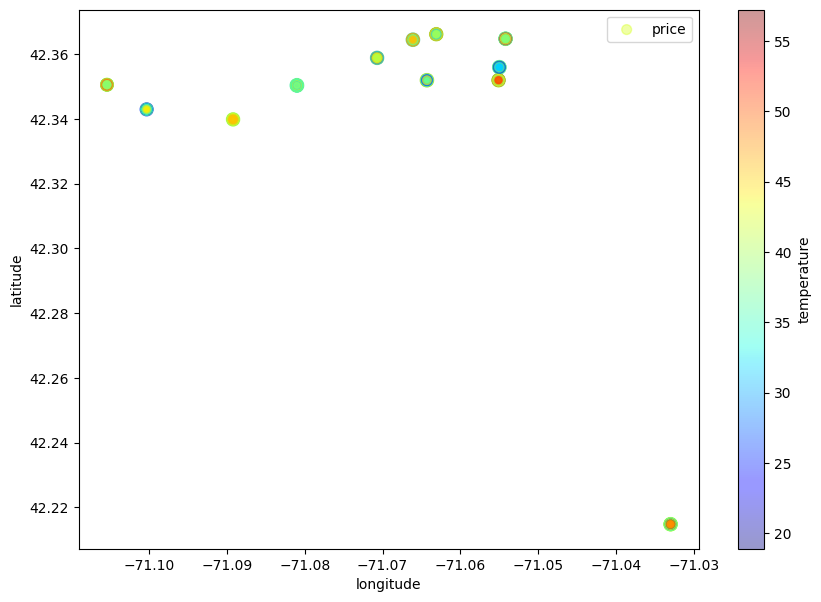

In [ ]:
 analysis_df.plot(kind="scatter", x="longitude", y="latitude",
    s=analysis_df['price'], label="price",
    c="temperature", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

#PRICE ANALYSIS

In [ ]:
import plotly.figure_factory as ff

In [ ]:
import random
random.seed(100)

In [ ]:
viz_df = analysis_df.sample(frac =.25)

In [ ]:
fig = ff.create_distplot([viz_df["price"].dropna().values.tolist()], group_labels=['distplot'])
fig.show()

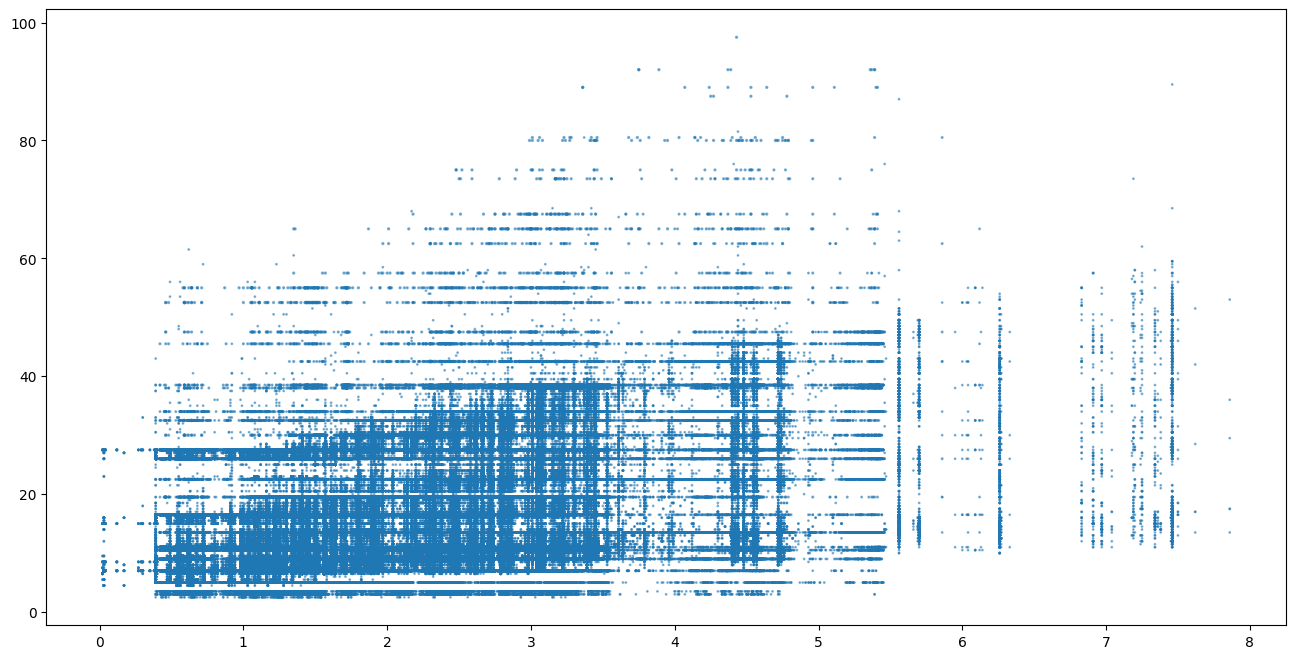

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(x=analysis_df["distance"], y=analysis_df["price"], s=analysis_df["surge_multiplier"], alpha=0.5)
plt.show()

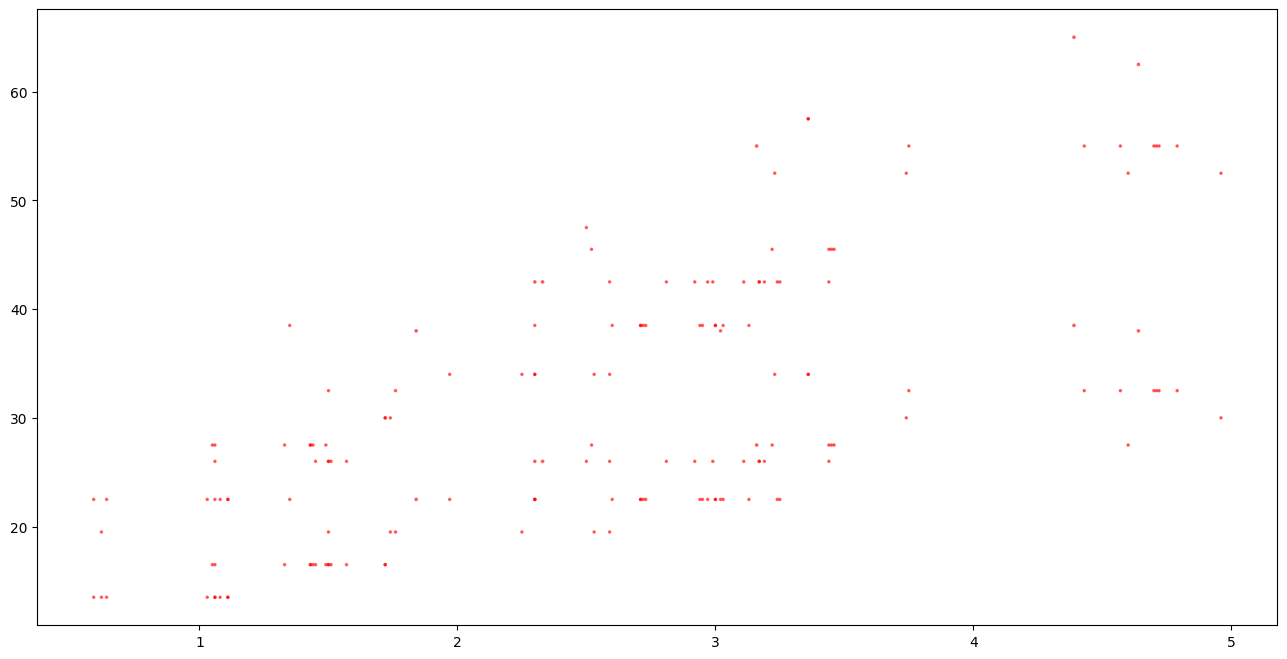

In [ ]:
surge_data = analysis_df[analysis_df["surge_multiplier"]>2.0]
plt.figure(figsize=(16,8))
plt.scatter(x=surge_data["distance"], y=surge_data["price"], marker='o', c='r',s=surge_data["surge_multiplier"], alpha=0.5)
plt.show()

#VISUALIZATION OF CORELATION

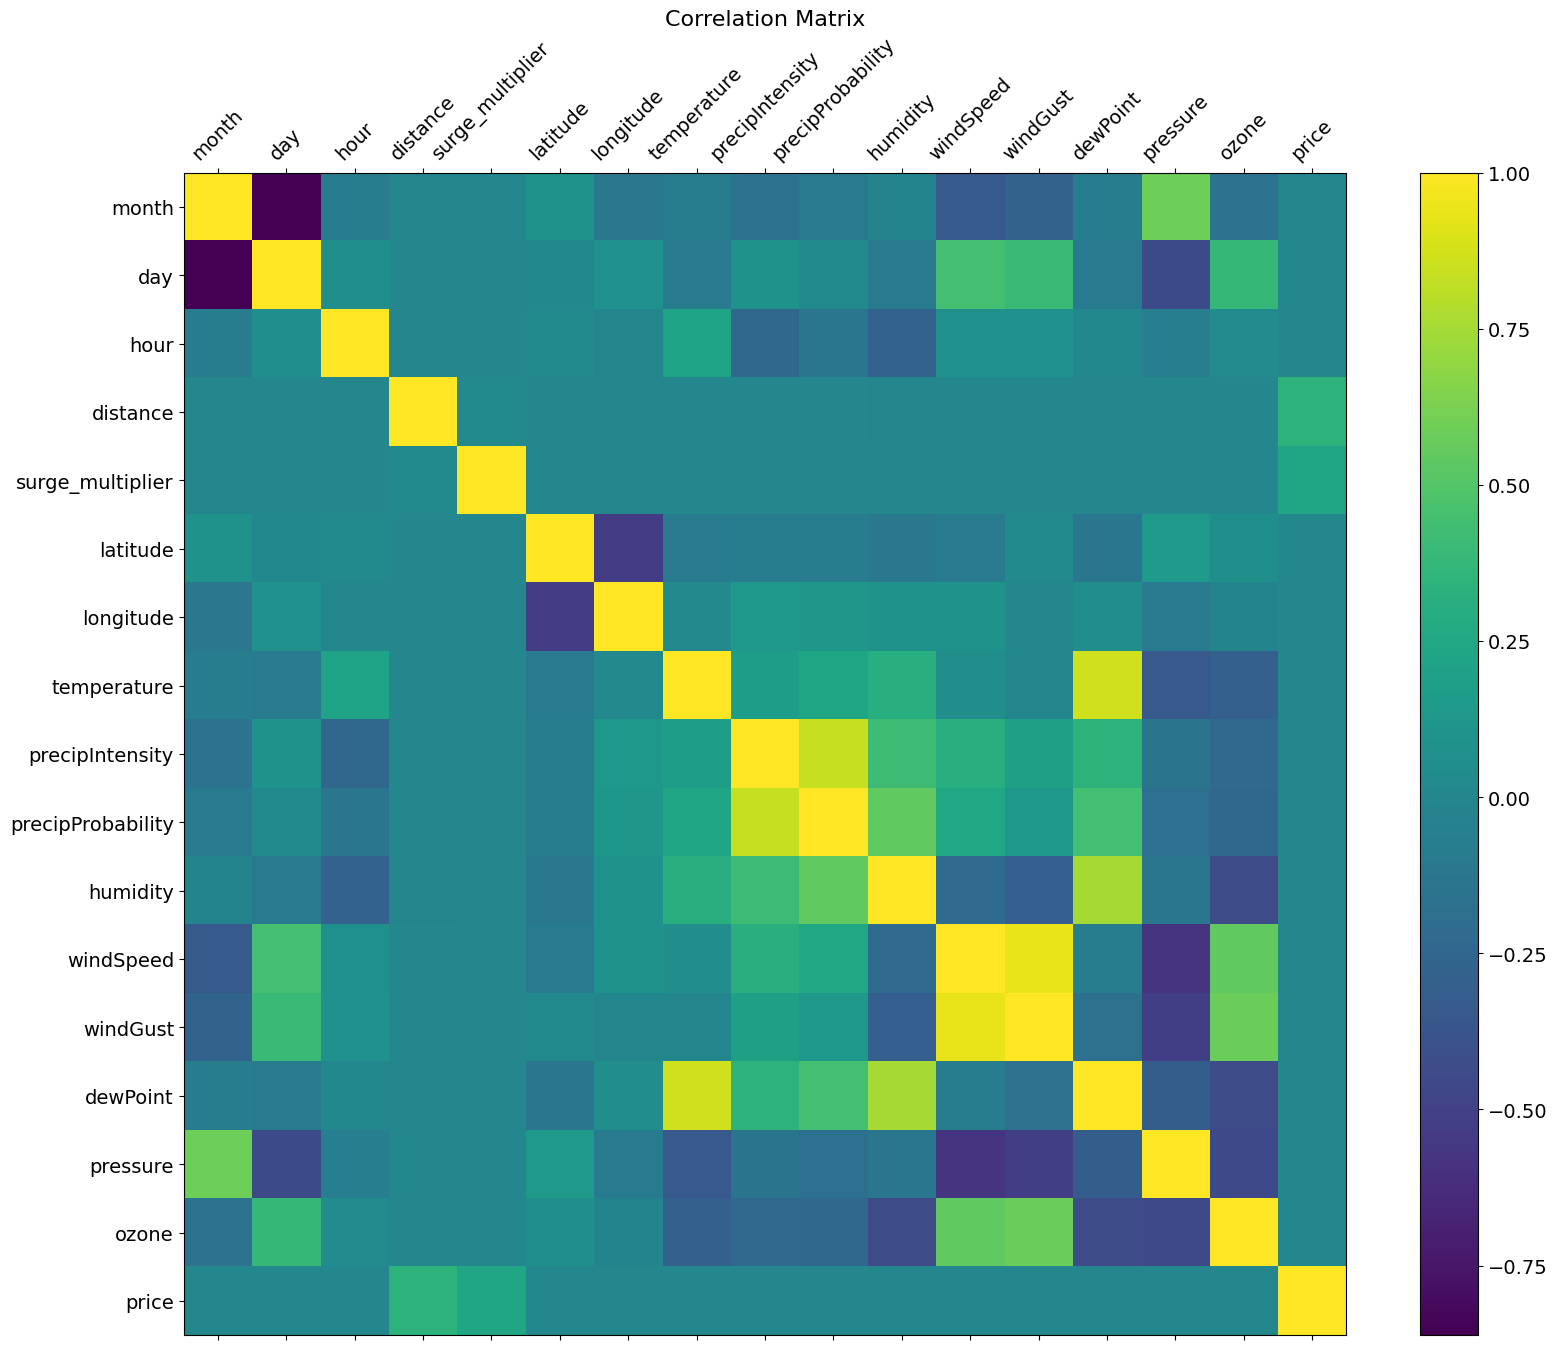

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(analysis_df.corr(), fignum=f.number)
plt.xticks(range(analysis_df.select_dtypes(['number']).shape[1]), analysis_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(analysis_df.select_dtypes(['number']).shape[1]), analysis_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

#LINEAR MODEL

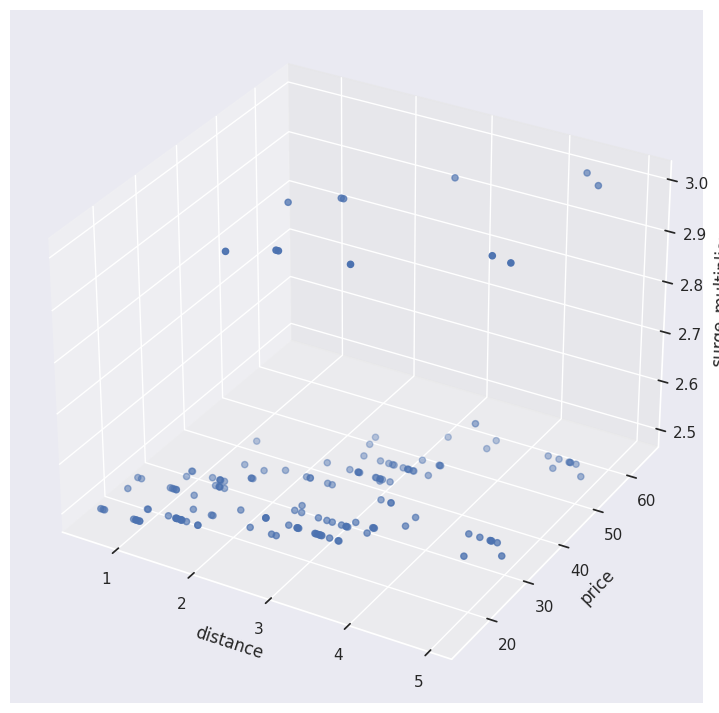

In [ ]:
import seaborn as sns
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection = '3d')

x = surge_data['distance']
y = surge_data['price']
z = surge_data['surge_multiplier']
ax.set_xlabel("distance")
ax.set_ylabel("price")
ax.set_zlabel("surge_multiplier")

ax.scatter(x, y, z)

plt.show()

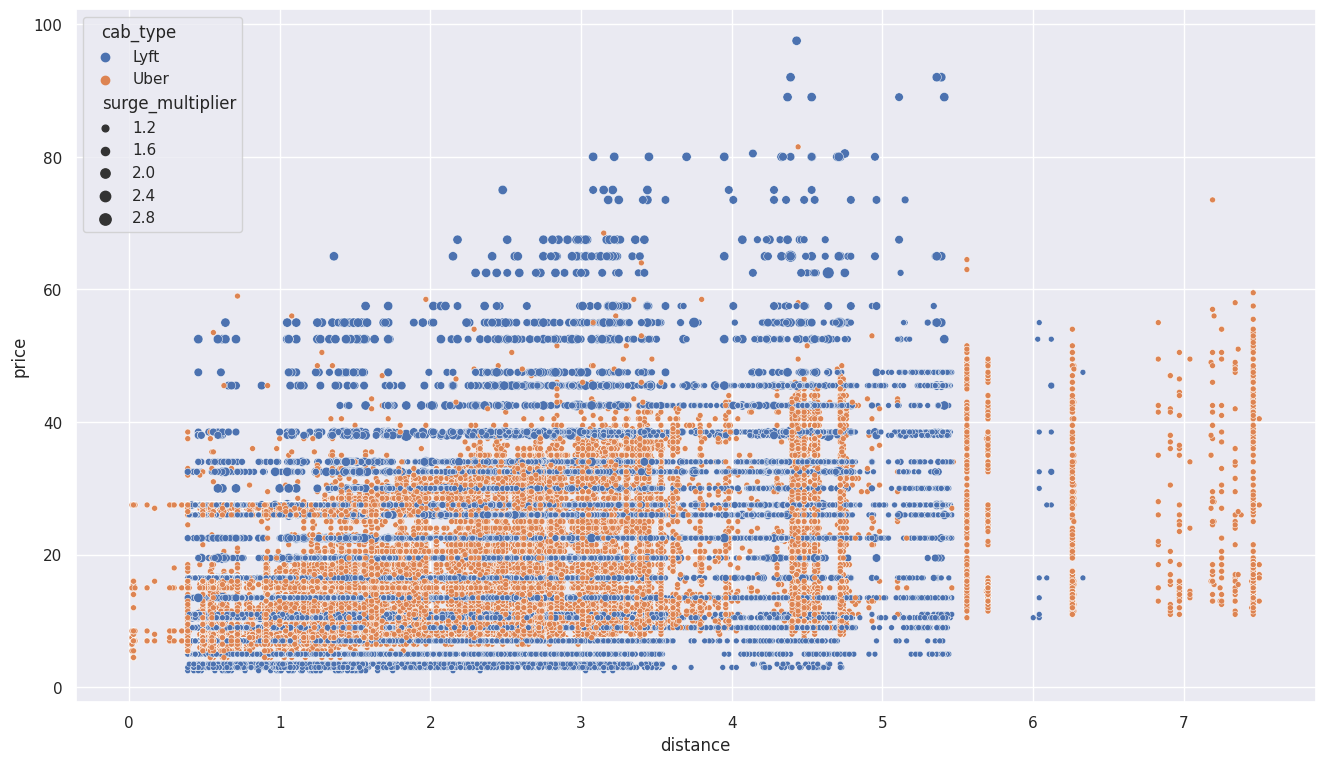

In [ ]:
df = analysis_df[(analysis_df["hour"]>=22) | (analysis_df["hour"]<=4)]
plt.figure(figsize=(16,9))
sns.scatterplot(data = df, x = "distance",
                y = "price", hue = "cab_type", size = "surge_multiplier")
plt.show()

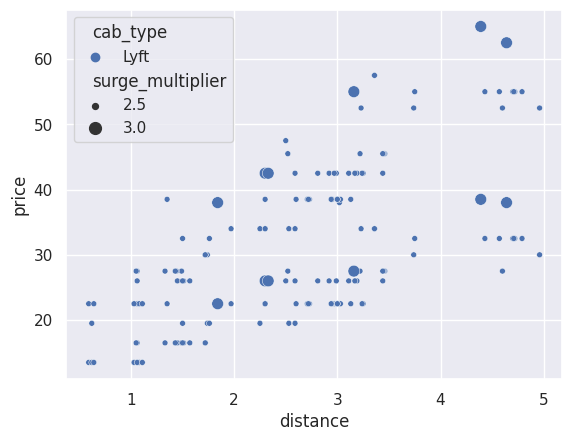

In [ ]:
sns.scatterplot(data = surge_data, x = "distance",
                y = "price", hue = "cab_type", size = "surge_multiplier")
plt.show()

In [ ]:
linear_df = analysis_df[["distance","surge_multiplier","price"]]

In [ ]:
linear_df.dropna(inplace = True)

In [ ]:
#separate the other attributes from the predicting attribute
x = linear_df.drop("price",axis=1)
#separte the predicting attribute into Y for model training 
y = linear_df["price"]

In [ ]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_prediction =  LR.predict(x_test)

In [ ]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.17502695205749397
mean_sqrd_error is== 71.92149895182435
root_mean_squared error of is== 8.48065439407976


In [ ]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                 6.659e+04
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        10:03:43   Log-Likelihood:            -2.2691e+06
No. Observations:              637976   AIC:                         4.538e+06
Df Residuals:                  637973   BIC:                         4.538e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -12.5290      0.115  

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.12.0


In [ ]:
train_dataset = linear_df.sample(frac=0.8, random_state=0)
test_dataset = linear_df.drop(train_dataset.index)

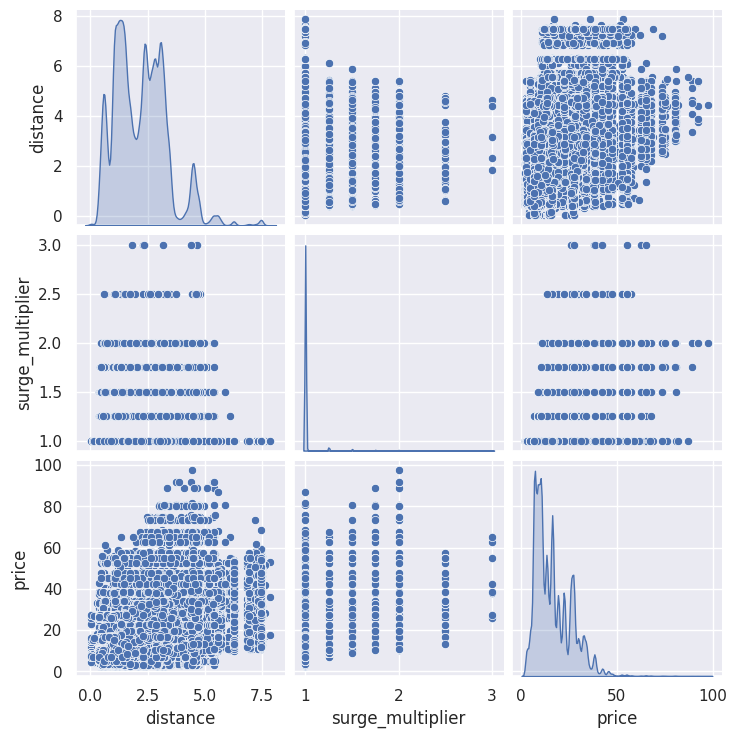

In [ ]:
import seaborn as sns
sns.pairplot(train_dataset,diag_kind='kde')

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('price')
test_labels = test_features.pop('price')

In [ ]:
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[2.1897483 1.0150477]]


In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 128ms/step


array([[ 0.05997107],
       [-0.7005952 ],
       [ 0.32571104],
       [-0.0683173 ],
       [ 0.26156688],
       [-0.20118728],
       [ 2.1629822 ],
       [ 0.32571104],
       [-0.42569172],
       [-0.5677252 ]], dtype=float32)

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[0.52041006],
       [0.1722703 ]], dtype=float32)>

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=10,
    # suppress logging
    verbose=2,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/10
12760/12760 - 21s - loss: 6.8672 - val_loss: 6.8217 - 21s/epoch - 2ms/step
Epoch 2/10
12760/12760 - 20s - loss: 6.8253 - val_loss: 6.8188 - 20s/epoch - 2ms/step
Epoch 3/10
12760/12760 - 18s - loss: 6.8241 - val_loss: 6.8123 - 18s/epoch - 1ms/step
Epoch 4/10
12760/12760 - 20s - loss: 6.8238 - val_loss: 6.8160 - 20s/epoch - 2ms/step
Epoch 5/10
12760/12760 - 20s - loss: 6.8239 - val_loss: 6.8167 - 20s/epoch - 2ms/step
Epoch 6/10
12760/12760 - 21s - loss: 6.8249 - val_loss: 6.8330 - 21s/epoch - 2ms/step
Epoch 7/10
12760/12760 - 18s - loss: 6.8242 - val_loss: 6.8174 - 18s/epoch - 1ms/step
Epoch 8/10
12760/12760 - 22s - loss: 6.8243 - val_loss: 6.8236 - 22s/epoch - 2ms/step
Epoch 9/10
12760/12760 - 21s - loss: 6.8249 - val_loss: 6.8152 - 21s/epoch - 2ms/step
Epoch 10/10
12760/12760 - 21s - loss: 6.8237 - val_loss: 6.8182 - 21s/epoch - 2ms/step
CPU times: user 3min 23s, sys: 10.7 s, total: 3min 33s
Wall time: 4min 22s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss  val_loss  epoch
5  6.824904  6.832962      5
6  6.824185  6.817370      6
7  6.824323  6.823642      7
8  6.824876  6.815175      8
9  6.823689  6.818158      9

In [ ]:
import matplotlib.pyplot as plt
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

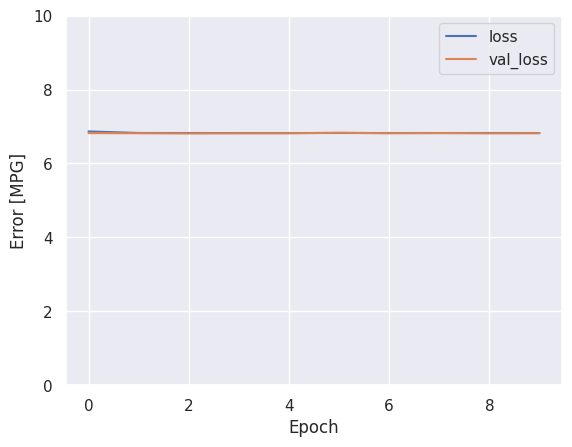

In [ ]:
plot_loss(history)

In [ ]:
def plot_data(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=56e571a6ba3c9237807fd69f8a2747e55e5152b8d53a96074889de0171e5169f
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
sc= SparkContext()
sqlContext = SQLContext(sc)
df = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load ('/tmp/rideshare_kaggle.csv')
df.take(1)

[Row(id='424553bb-7174-41ea-aeb4-fe06d4f4b9d7', timestamp=1544952607.89, hour=9, day=16, month=12, datetime=datetime.datetime(2018, 12, 16, 9, 30, 7), timezone='America/New_York', source='Haymarket Square', destination='North Station', cab_type='Lyft', product_id='lyft_line', name='Shared', price='5', distance=0.44, surge_multiplier=1.0, latitude=42.2148, longitude=-71.033, temperature=42.34, apparentTemperature=37.12, short_summary=' Mostly Cloudy ', long_summary=' Rain throughout the day. ', precipIntensity=0.0, precipProbability=0.0, humidity=0.68, windSpeed=8.66, windGust=9.17, windGustTime=1545015600, visibility=10.0, temperatureHigh=43.68, temperatureHighTime=1544968800, temperatureLow=34.19, temperatureLowTime=1545048000, apparentTemperatureHigh=37.95, apparentTemperatureHighTime=1544968800, apparentTemperatureLow=27.39, apparentTemperatureLowTime=1545044400, icon=' partly-cloudy-night ', dewPoint=32.7, pressure=1021.98, windBearing=57, cloudCover=0.72, uvIndex=0, visibility.1=1

In [ ]:
df.cache()
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- timestamp: double (nullable = true)
 |-- hour: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- datetime: timestamp (nullable = true)
 |-- timezone: string (nullable = true)
 |-- source: string (nullable = true)
 |-- destination: string (nullable = true)
 |-- cab_type: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- price: string (nullable = true)
 |-- distance: double (nullable = true)
 |-- surge_multiplier: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- temperature: double (nullable = true)
 |-- apparentTemperature: double (nullable = true)
 |-- short_summary: string (nullable = true)
 |-- long_summary: string (nullable = true)
 |-- precipIntensity: double (nullable = true)
 |-- precipProbability: double (nullable = true)
 |-- humidity: double (nullable = true)
 |

In [ ]:
from pyspark.sql.types import IntegerType
df = df.withColumn("price", df["price"].cast(IntegerType()))

In [ ]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ["distance","surge_multiplier"], outputCol = 'features')
vhouse_df = vectorAssembler.transform(df)
vhouse_df = vhouse_df.select(['features',"price"])
vhouse_df.show(3)

+----------+-----+
|  features|price|
+----------+-----+
|[0.44,1.0]|    5|
|[0.44,1.0]|   11|
|[0.44,1.0]|    7|
+----------+-----+
only showing top 3 rows



In [ ]:
splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [ ]:
# from pyspark.ml.regression import LinearRegression
# lr = LinearRegression(featuresCol = 'features', labelCol="price", maxIter=10, regParam=0.3, elasticNetParam=0.8)
# lr_model = lr.fit(train_df)
# print("Coefficients: " + str(lr_model.coefficients))
# print("Intercept: " + str(lr_model.intercept))

# KESIMPULAN
Setelah melakukan proses visualisai data dan analisis maka dapat ditarik kesimpulan bahwa jumlah order ataui pesananUber lebih uggul dibandingakan Lyft dari segalaa aspek periode waktu.